In [16]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
import LVQ

In [17]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train[:, 0:6] = minmax.fit_transform(x_train)
x_test[:, 0:6]  = minmax.transform(x_test)

In [18]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [19]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [49]:
labels = np.zeros((4, 10, 10))

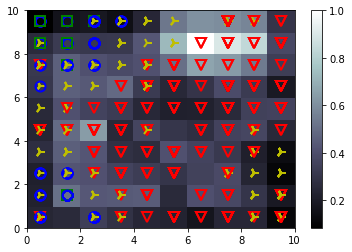

In [50]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['v', 's', 'o', '4']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [53]:
for i in range(4):
    for j in range(10):
        for k in range(10):
            total = labels[0, j, k] + labels[1, j, k] + labels[2, j, k] + labels[3, j, k]
            if total == 0. :
                continue
            else:
                labels[i, j, k] = labels[i, j, k] / total
                labels[i, j, k] = round(labels[i, j, k], 3)
                
#                 Đang có vấn đề tính xác suất

In [52]:
labels.shape

(4, 10, 10)

In [54]:
labels

array([[[0.019, 0.   , 0.   , 0.   , 0.8  , 0.   , 0.   , 0.045, 0.   ,
         0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.4  , 0.2  , 0.   , 0.   , 0.   ,
         0.   ],
        [0.   , 0.   , 0.2  , 1.   , 1.   , 1.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.5  , 0.2  , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 0.   ,
         0.   ],
        [1.   , 1.   , 1.   , 1.   , 0.75 , 1.   , 0.5  , 0.091, 0.   ,
         0.   ],
        [1.   , 0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 0.   ,
         0.   ],
        [1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
         0.   ],
        [1.   , 1.   , 0.556, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
         0.966],
        [0.091, 0.   , 0.   , 0.143, 0.286, 1.   , 1.   , 1.   , 1.   ,
         0.8  ],
        [0.875, 0.125, 0.   , 0.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
         1.   ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.804,
         0.857],
        [0.   , 0.3

In [23]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [24]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]]/tmp[sort[2]] < 5): # must be improve
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [25]:
from random import randint
p_vectors = []
count_death = 0
for i in range(10):
    for j in range(10):
        if(labels[0, i, i] == 0 and labels[1, i, i] == 0 and labels[2, i, i] == 0 and labels[3, i, i] == 0):
#             p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
#             p_vectors.append(p)
            count_death = count_death + 1
        elif(taggings[i][j] == 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

3 	 [0.18224881 0.25225407 0.69200544 0.42819106 0.1652795  0.46218701]
3 	 [0.24535231 0.33249681 0.55917907 0.50496203 0.20894226 0.46682262]
3 	 [0.31593746 0.36612067 0.49855688 0.54379967 0.23988495 0.40536075]
3 	 [0.32588492 0.40224024 0.40731201 0.56442988 0.30342511 0.39427256]
0 	 [0.39325253 0.3905586  0.46583471 0.51836155 0.38983387 0.2348304 ]
3 	 [0.40377655 0.41059402 0.40815632 0.55075857 0.33464251 0.29404907]
3 	 [0.36025845 0.42759392 0.30707438 0.57208601 0.29160301 0.42516807]
3 	 [0.29217731 0.42652122 0.15572686 0.59796345 0.25669953 0.5338598 ]
1 	 [0.23638375 0.43994217 0.11400819 0.57474823 0.17039623 0.61498401]
1 	 [0.24813668 0.43953601 0.18545989 0.58283296 0.14700276 0.59121641]
3 	 [0.2441961  0.34940454 0.55725058 0.51419046 0.18633711 0.45677476]
2 	 [0.2393701  0.35689768 0.49747237 0.52215736 0.18462295 0.51099246]
2 	 [0.3074151  0.40735247 0.44745097 0.55038687 0.24805967 0.41819641]
3 	 [0.34736171 0.39663073

In [26]:
count_death

0

In [27]:
lvq = LVQ.LVQ(x_train[:, 0:6], y_train, n_classes=2, n_neurons=R, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train[:, 0:6], y_train)

In [28]:
predicted_y = [lvq.predict(instance) for instance in x_test[:, 0:6]]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       1.00      0.87      0.93        54
          1       0.95      0.91      0.93        23
          2       0.50      0.25      0.33         8
          3       0.78      0.98      0.87        47

avg / total       0.88      0.88      0.87       132



In [29]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8787878787878788

In [30]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92       558
          1       0.93      0.85      0.89       165
          2       0.61      0.33      0.43       139
          3       0.73      0.94      0.82       453

avg / total       0.84      0.84      0.83      1315

